#**PythonでFREDから経済統計をダウンロードする**

このColabノートブックでは、モジュールpandas-datareaderを使って、FREDから経済統計（経済データ）をダウンロードする方法を解説します。また、最後に応用問題として日本のフィリップス曲線をプロットする方法を説明します。

なお、このノートブックは「[Pythonの第一歩](https://colab.research.google.com/github/koiti-yano/colab/blob/main/経済統計_python入門_1_basic.ipynb)」をすでに読んでいることを前提にしています。


**FREDとは？**
<br>
FRED（Federal Reserve Economic Data）とはアメリカのセントルイス連邦準備銀行が提供している経済統計データベースです。このサイトではアメリカを含め世界各国の経済統計（経済データ）約80万種類が提供されています。提供しているデータはすべてオープンデータです（オープンデータは講義資料で説明済み）。

**FRED公式サイト**
<br>
https://fred.stlouisfed.org/

**pandas-datareader公式サイト**
<br>
https://pydata.github.io/pandas-datareader/remote_data.html#remote-data-fred 

In [17]:
# 最初に重要な呪文を唱えます。
# pandas_datareader.dataをdrという名前で読み込みます
# 呼び出すモジュール名がpandas_datareaderであることに注意！
import pandas_datareader as dr
import pandas as pd
# datetimeをdtという名前で読み込みます
import datetime as dt


まず、日本の実質GDPをダウンロードすることを考えてみましょう。Googleで"FRED japan real gdp"と検索するとReal Gross Domestic Product for Japanという以下のページが見つかります。

https://fred.stlouisfed.org/series/JPNRGDPEXP

このページにあるJPNRGDPEXPという文字列が「日本の実質GDP」を意味していますので、このJPNRGDPEXPを使ってFREDからデータをダウンロードします。

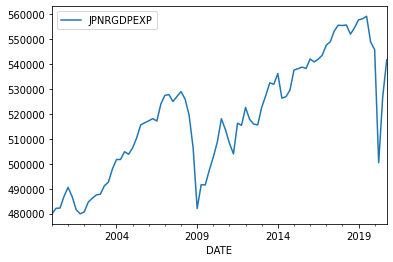

In [18]:

start = dt.datetime(2000, 1, 1)
end = dt.datetime(2020, 12, 31)

jp_real_gdp = dr.DataReader('JPNRGDPEXP', 'fred', start, end)

jp_real_gdp.plot()

jp_real_gdpにどのようなデータが入っているのか少し見たい場合はhead()というメソッドを使うか、display()という関数を使うのがお勧めです（どちらを使うかは場合によります）。

In [19]:
jp_real_gdp.head()
#display(jp_real_gdp)

,JPNRGDPEXP
DATE,
2000-01-01,479896.6
2000-04-01,482128.3
2000-07-01,482257.6
2000-10-01,486937.3
2001-01-01,490542.7


次にアメリカ合衆国の実質GDPをダウンロードすることを考えてみましょう。Googleで"FRED US real gdp"と検索するとReal Gross Domestic Product (GDPC1)という以下のページが見つかります。 

https://fred.stlouisfed.org/series/GDPC1

このページにあるGDPC1という文字列が「アメリカの実質GDP」を意味していますので、このGDPC1を使ってFREDからデータをダウンロードします。

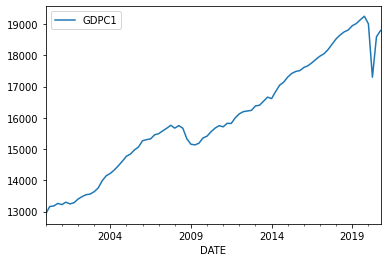

In [20]:
us_real_gdp = dr.DataReader('GDPC1', 'fred', start, end)

us_real_gdp.plot()

**日・米・仏の失業率**

日・米・仏の失業率をプロットする方法を考えてみましょう。

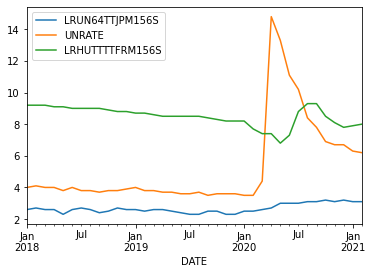

In [21]:
start = dt.datetime(2018, 1, 1)
end = dt.datetime(2021, 2, 28)

jp_us_unemp = dr.DataReader(['LRUN64TTJPM156S', 'UNRATE', 'LRHUTTTTFRM156S'], 'fred', start, end)
jp_us_unemp.plot()

**日本のフィリップス曲線**

最後に今までの知識を使って日本のフィリップス曲線をプロットしてみましょう。

https://fred.stlouisfed.org/series/LRUN64TTJPA156N

https://fred.stlouisfed.org/series/FPCPITOTLZGJPN


In [22]:
start = dt.datetime(1970, 1, 1)
end = dt.datetime(2020, 12, 31)

jp_phillips = dr.DataReader(['LRUN64TTJPA156N', 'FPCPITOTLZGJPN'], 'fred', start, end)
jp_phillips.head()


,LRUN64TTJPA156N,FPCPITOTLZGJPN
DATE,,
1970-01-01,1.183333,6.924174
1971-01-01,1.266667,6.395349
1972-01-01,1.433333,4.843517
1973-01-01,1.300000,11.608624
1974-01-01,1.391667,23.222246


https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html

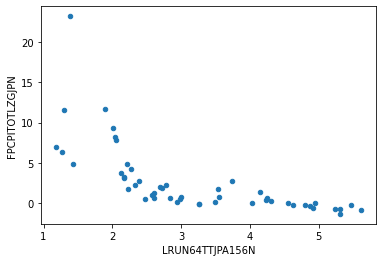

In [23]:
jp_phillips.plot.scatter(x="LRUN64TTJPA156N", y="FPCPITOTLZGJPN")

散布図に日本のフィリップス曲線が表示されました。案外簡単ですね。

この例から「Pythonを学ぶと効率的にデータ分析ができるようになる」ことを分かってもらえればと思います。

**まとめ**

pandas_datareaderはFRED以外にもいろいろな経済統計データベース（オープンデータ）からデータを一気にダウンロードできる便利なモジュールです。

興味が湧いた人は公式サイトや以下の参考文献をみて、ぜひいろいろと試してみてください。

**公式サイト**
<br>
https://pydata.github.io/pandas-datareader/remote_data.html
<br>
<br>
**参考文献**

https://medium.com/swlh/pandas-datareader-federal-reserve-economic-data-fred-a360c5795013

https://dev.classmethod.jp/articles/pandas_datareader-python/

https://qiita.com/innovation1005/items/edcf78cbf89477b3b0a7
